In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm


In [2]:
data = pd.read_csv(r"1.3 1.04. Real-life example.csv")
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [3]:
data.describe(include ='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [4]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [5]:
data.dropna(axis = 0, inplace=True)

In [6]:
data.describe(include= "all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [7]:
column_to_drop=["Registration",'Model']
data.drop(column_to_drop, axis = 1, inplace = True)

In [8]:
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,2011
...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,1985


In [9]:
data_after_encoding= pd.get_dummies(data)

In [10]:
data_after_encoding

,Price,Mileage,EngineV,Year,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,...,Body_crossover,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
0,4200.0,277,2.0,1991,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,7900.0,427,2.9,1999,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,13300.0,358,5.0,2003,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,23000.0,240,4.2,2007,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,18300.0,120,2.0,2011,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,17900.0,35,1.6,2014,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4340,125000.0,9,3.0,2014,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4341,6500.0,1,3.5,1999,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4342,8000.0,194,2.0,1985,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


C:\Users\baniy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

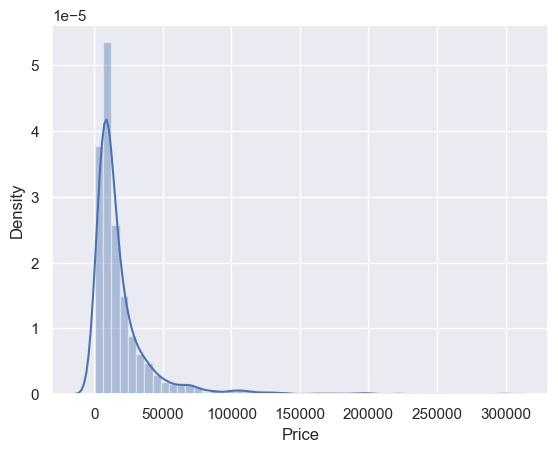

In [11]:
sns.distplot(data_after_encoding["Price"])

In [12]:
a = data_after_encoding['Price'].quantile(0.99)
data_1= data_after_encoding[data_after_encoding["Price"]<a]
data_1

,Price,Mileage,EngineV,Year,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,...,Body_crossover,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
0,4200.0,277,2.0,1991,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,7900.0,427,2.9,1999,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,13300.0,358,5.0,2003,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,23000.0,240,4.2,2007,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,18300.0,120,2.0,2011,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,17900.0,35,1.6,2014,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4340,125000.0,9,3.0,2014,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4341,6500.0,1,3.5,1999,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4342,8000.0,194,2.0,1985,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


C:\Users\baniy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

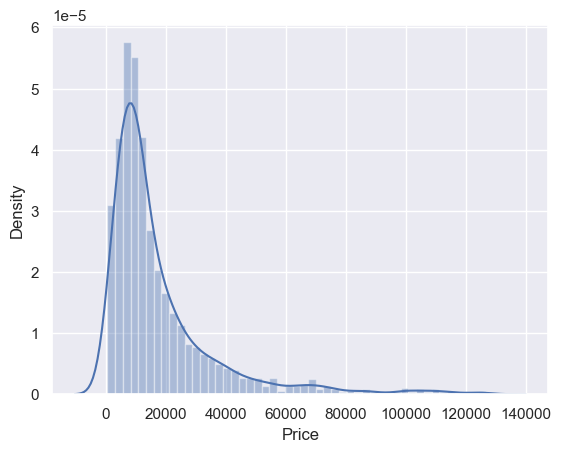

In [13]:
sns.distplot(data_1["Price"])

C:\Users\baniy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

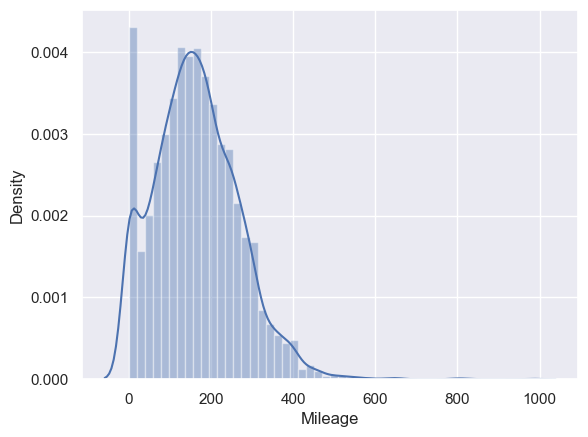

In [14]:
sns.distplot(data_1["Mileage"])


In [15]:
b= data_1['Mileage'].quantile(0.99)
data_2= data_1[data_1["Mileage"]<b]
data_2

,Price,Mileage,EngineV,Year,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,...,Body_crossover,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
0,4200.0,277,2.0,1991,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,7900.0,427,2.9,1999,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,13300.0,358,5.0,2003,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,23000.0,240,4.2,2007,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,18300.0,120,2.0,2011,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,17900.0,35,1.6,2014,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4340,125000.0,9,3.0,2014,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4341,6500.0,1,3.5,1999,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4342,8000.0,194,2.0,1985,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


C:\Users\baniy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

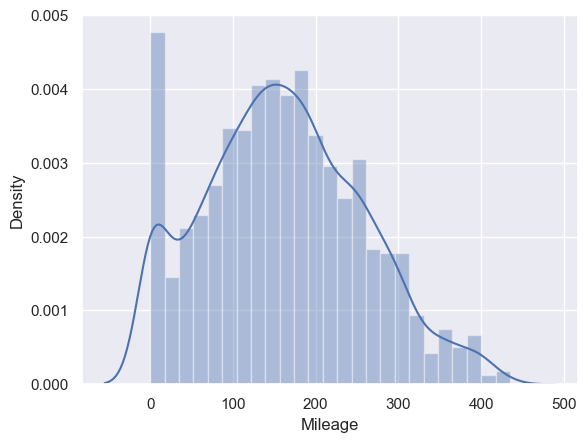

In [16]:
sns.distplot(data_2["Mileage"])

C:\Users\baniy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

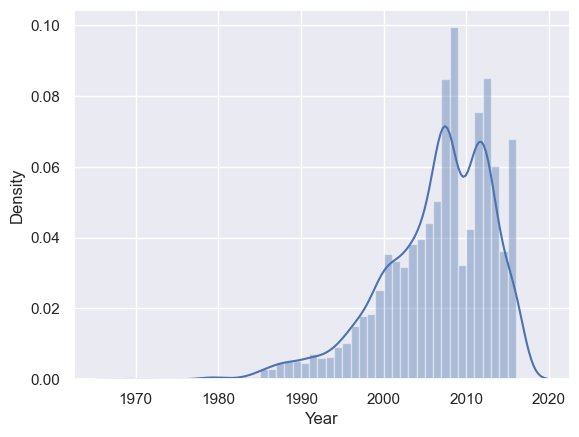

In [17]:
sns.distplot(data_2["Year"])

C:\Users\baniy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

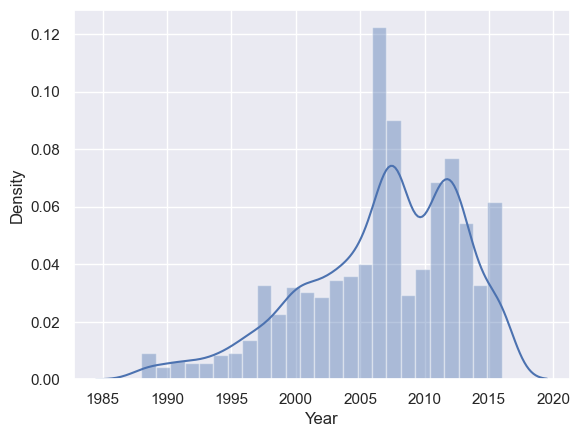

In [18]:
b= data_2['Year'].quantile(0.01)
data_3= data_2[data_2["Year"]>b]
sns.distplot(data_3["Year"])

C:\Users\baniy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

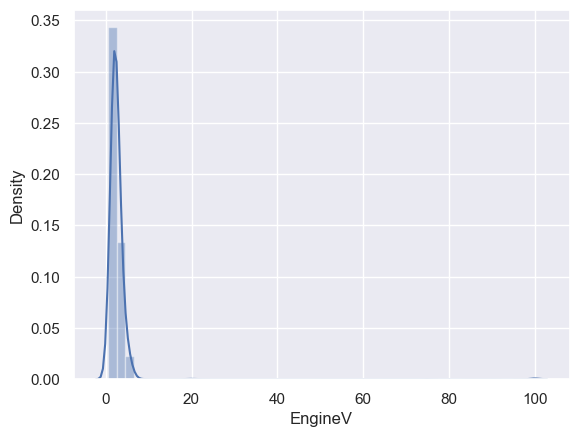

In [19]:
sns.distplot(data_1["EngineV"])

C:\Users\baniy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

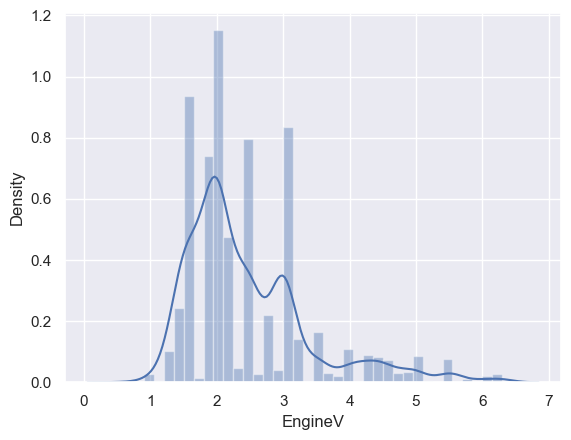

In [20]:
data_4= data_3[data_3["EngineV"]<6.5]
sns.distplot(data_4["EngineV"])

In [21]:
data_4

,Price,Mileage,EngineV,Year,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,...,Body_crossover,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
0,4200.0,277,2.0,1991,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,7900.0,427,2.9,1999,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,13300.0,358,5.0,2003,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,23000.0,240,4.2,2007,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,18300.0,120,2.0,2011,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4338,11500.0,163,2.5,2008,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4339,17900.0,35,1.6,2014,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4340,125000.0,9,3.0,2014,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4341,6500.0,1,3.5,1999,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [22]:
data_cleaned = data_4.reset_index(drop = True)

In [23]:
data_cleaned.describe(include= "all")

,Price,Mileage,EngineV,Year,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,...,Body_crossover,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
count,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,...,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000
mean,18194.455679,160.542539,2.450440,2006.709853,0.105508,0.161365,0.195242,0.078097,0.111715,0.128782,...,0.205586,0.065425,0.095681,0.379364,0.096199,0.157745,0.467287,0.146884,0.025601,0.360228
std,19085.855165,95.633291,0.949366,6.103870,0.307247,0.367915,0.396438,0.268358,0.315056,0.335002,...,0.404181,0.247307,0.294192,0.485291,0.294902,0.364549,0.498993,0.354036,0.157963,0.480128
min,800.000000,0.000000,0.600000,1988.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7200.000000,91.000000,1.800000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11700.000000,157.000000,2.200000,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,21700.000000,225.000000,3.000000,2012.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,129222.000000,435.000000,6.300000,2016.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 1.0, 'price and EngineV')

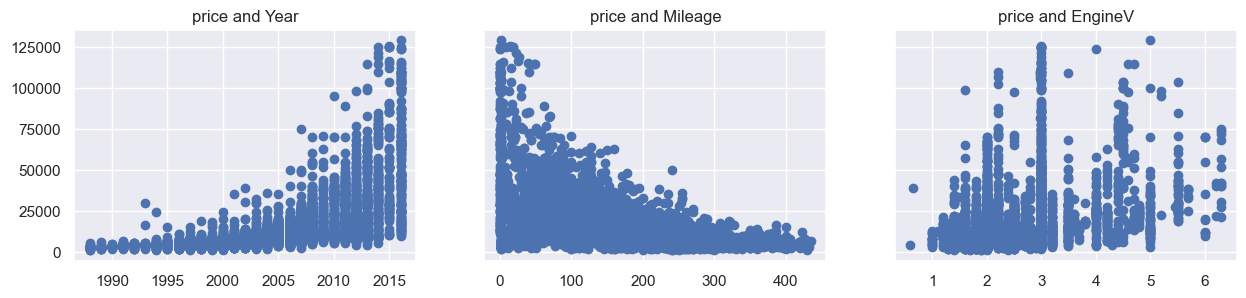

In [24]:
f,(ax1,ax2,ax3)= plt.subplots(1,3, sharey = True, figsize=(15,3))
ax1.scatter(data_cleaned["Year"],data_cleaned["Price"])
ax1.set_title("price and Year")
ax2.scatter(data_cleaned["Mileage"],data_cleaned["Price"])
ax2.set_title("price and Mileage")
ax3.scatter(data_cleaned["EngineV"],data_cleaned["Price"])
ax3.set_title("price and EngineV")

In [25]:
log_price = np.log(data_cleaned["Price"])
data_cleaned["log_price"]=log_price
data_cleaned

,Price,Mileage,EngineV,Year,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,...,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,log_price
0,4200.0,277,2.0,1991,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,8.342840
1,7900.0,427,2.9,1999,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,8.974618
2,13300.0,358,5.0,2003,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,9.495519
3,23000.0,240,4.2,2007,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,10.043249
4,18300.0,120,2.0,2011,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,9.814656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,11500.0,163,2.5,2008,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,9.350102
3863,17900.0,35,1.6,2014,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,9.792556
3864,125000.0,9,3.0,2014,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,11.736069
3865,6500.0,1,3.5,1999,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,8.779557


Text(0.5, 1.0, 'log_price and EngineV')

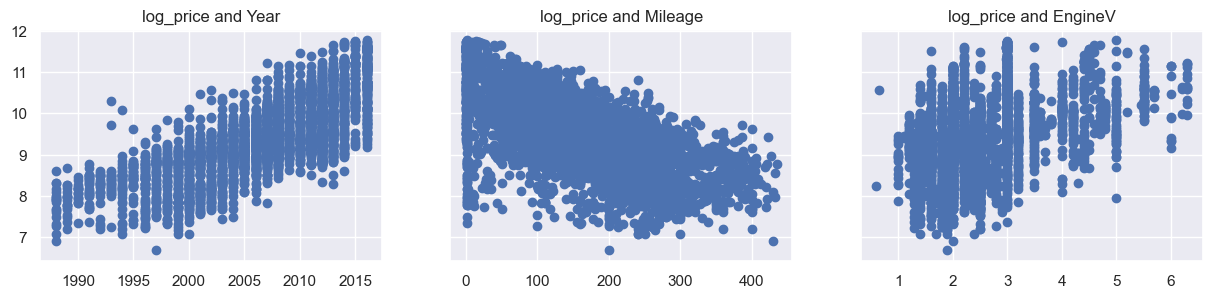

In [26]:
f,(ax1,ax2,ax3)= plt.subplots(1,3, sharey = True, figsize=(15,3))
ax1.scatter(data_cleaned["Year"],data_cleaned["log_price"])
ax1.set_title("log_price and Year")
ax2.scatter(data_cleaned["Mileage"],data_cleaned["log_price"])
ax2.set_title("log_price and Mileage")
ax3.scatter(data_cleaned["EngineV"],data_cleaned["log_price"])
ax3.set_title("log_price and EngineV")

In [27]:
data_cleaned.drop(["Price"], axis = 1)

,Mileage,EngineV,Year,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,log_price
0,277,2.0,1991,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,8.342840
1,427,2.9,1999,0,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,8.974618
2,358,5.0,2003,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,9.495519
3,240,4.2,2007,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,10.043249
4,120,2.0,2011,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,9.814656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,163,2.5,2008,0,0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,9.350102
3863,35,1.6,2014,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,9.792556
3864,9,3.0,2014,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,11.736069
3865,1,3.5,1999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,8.779557


In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables= data_cleaned[["Mileage","Year","EngineV"]]
vif = pd.DataFrame()
vif["VIF"]= [variance_inflation_factor(variables,i) for i in range(variables.shape[1])]
vif["Features"]=variables.columns

In [31]:
vif

,VIF,Features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [33]:
data_no_multicollenarity= data_cleaned.drop(["Year"], axis=1)
data_no_multicollenarity

,Price,Mileage,EngineV,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,log_price
0,4200.0,277,2.0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,8.342840
1,7900.0,427,2.9,0,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,8.974618
2,13300.0,358,5.0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,9.495519
3,23000.0,240,4.2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,10.043249
4,18300.0,120,2.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,9.814656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,11500.0,163,2.5,0,0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,9.350102
3863,17900.0,35,1.6,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,9.792556
3864,125000.0,9,3.0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,11.736069
3865,6500.0,1,3.5,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,8.779557


In [37]:
data_no_multicollenarity.columns

Index(['Price', 'Mileage', 'EngineV', 'Brand_Audi', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_crossover', 'Body_hatch',
       'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Diesel', 'Engine Type_Gas', 'Engine Type_Other',
       'Engine Type_Petrol', 'log_price'],
      dtype='object')

In [39]:
Cols=['log_price','Price', 'Mileage', 'EngineV', 'Brand_Audi', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_crossover', 'Body_hatch',
       'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Diesel', 'Engine Type_Gas', 'Engine Type_Other',
       'Engine Type_Petrol']

In [42]:
data_preprocessed=data_no_multicollenarity[Cols]
data_preprocessed

,log_price,Price,Mileage,EngineV,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,...,Body_crossover,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
0,8.342840,4200.0,277,2.0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,8.974618,7900.0,427,2.9,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,9.495519,13300.0,358,5.0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,10.043249,23000.0,240,4.2,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,9.814656,18300.0,120,2.0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,9.350102,11500.0,163,2.5,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3863,9.792556,17900.0,35,1.6,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3864,11.736069,125000.0,9,3.0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3865,8.779557,6500.0,1,3.5,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [43]:
x = data_preprocessed.drop(["log_price"],axis=1)
y = data_preprocessed["log_price"]